In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders
import category_encoders as ce

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Visualisazition Libraries

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score

In [2]:
# Importing Data
df = pd.read_csv("./Dataset/Clustering/decision_car_evaluation.csv")
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
# Data Preparation
X = df.drop("class", axis = 1)
Y = df["class"]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

# Data Encoding
encoder = ce.OrdinalEncoder(cols = df.columns.drop('class'))
train_x = encoder.fit_transform(train_x)
test_x = encoder.transform(test_x)
train_x.head()

(1727, 6) (1727,) (1157, 6) (570, 6) (1157,) (570,)


,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [30]:
# Modelling

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 42)
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

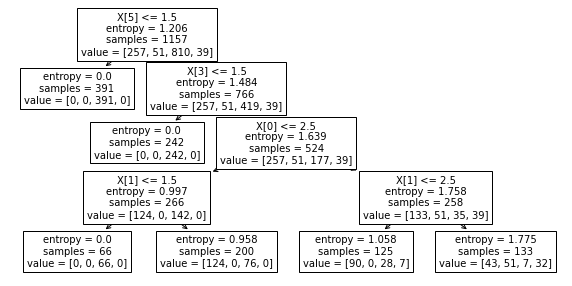

In [31]:
# Model Visualisazition

plt.figure(figsize=(10,5))
tree.plot_tree(model)
plt.show()

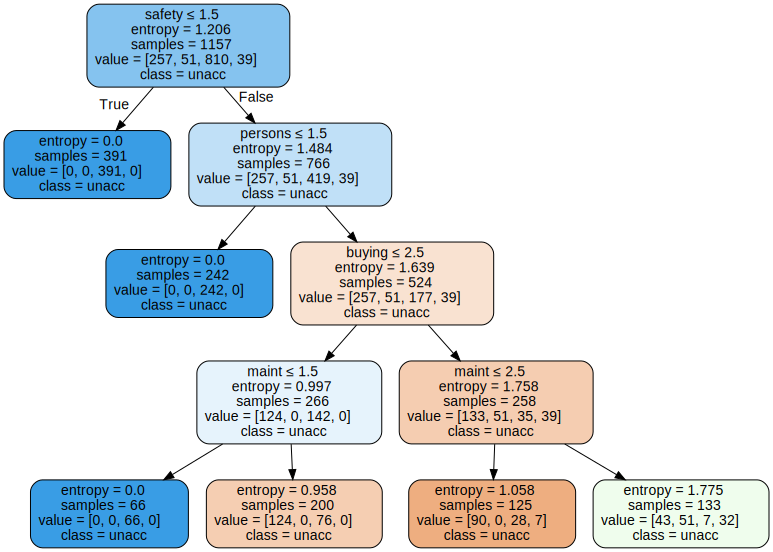

In [32]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=train_x.columns,  
                              class_names=train_y,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [33]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Training-set accuracy score: 0.8332
Training-set accuracy score: 0.8439


In [34]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

         acc       0.69      0.84      0.76       127
        good       0.31      1.00      0.47        18
       unacc       1.00      0.89      0.94       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.84       570
   macro avg       0.50      0.68      0.54       570
weighted avg       0.86      0.84      0.84       570



/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
